## Comparación entre resultados de la simulación y resultados teóricos

In [73]:
import numpy as np
import pandas as pd
import math

# Parámetros del sistema adaptados para 4 servidores
lambda_ = 15  # tasa de llegada (clientes por hora)
mu = 20       # tasa de servicio (clientes por hora)
c = 4         # número de servidores

# Cálculos intermedios
r = lambda_ / mu
rho = r / c

# Probabilidad de que no haya clientes en el sistema (P_0)
sumatoria = sum([(r**n) / math.factorial(n) for n in range(c)]) + (r**c) / (math.factorial(c) * (1 - rho))
P_0 = 1 / sumatoria

# Número promedio de clientes en la cola (L_q)
L_q = (r**c * rho / (math.factorial(c) * (1 - rho)**2)) * P_0

# Tiempo promedio de espera en la cola (W_q)
W_q = L_q / lambda_

# Lee los resultados de la simulación
results_df = pd.read_csv('all_simulations_statistics.csv')

# Filtra resultados según política de programación (FIFO y SJF) y número de servidores
fifo_results = results_df[(results_df['SJF'] == False) & (results_df['Num Librarians'] == c)]
sjf_results = results_df[(results_df['SJF'] == True) & (results_df['Num Librarians'] == c)]

# Calcula los valores medios de la simulación
mean_fifo_wait_time = fifo_results['Mean Wait Time'].mean()
mean_sjf_wait_time = sjf_results['Mean Wait Time'].mean()

mean_fifo_queue_length = fifo_results['Mean Queue Length'].mean()
mean_sjf_queue_length = sjf_results['Mean Queue Length'].mean()

# Crear un DataFrame para comparar los resultados teóricos y simulados
comparison_df = pd.DataFrame({
    "Indicador": ["Tiempo promedio de espera en la cola (W_q)", "Número promedio de clientes en la cola (L_q)"],
    "Teórico": [W_q, L_q],
    "Simulación FIFO": [mean_fifo_wait_time, mean_fifo_queue_length],
    "Simulación SJF": [mean_sjf_wait_time, mean_sjf_queue_length]
})

print(comparison_df)


                                      Indicador   Teórico  Simulación FIFO  \
0    Tiempo promedio de espera en la cola (W_q)  0.000118         3.423077   
1  Número promedio de clientes en la cola (L_q)  0.001768         0.036154   

   Simulación SJF  
0        3.418333  
1        0.035833  


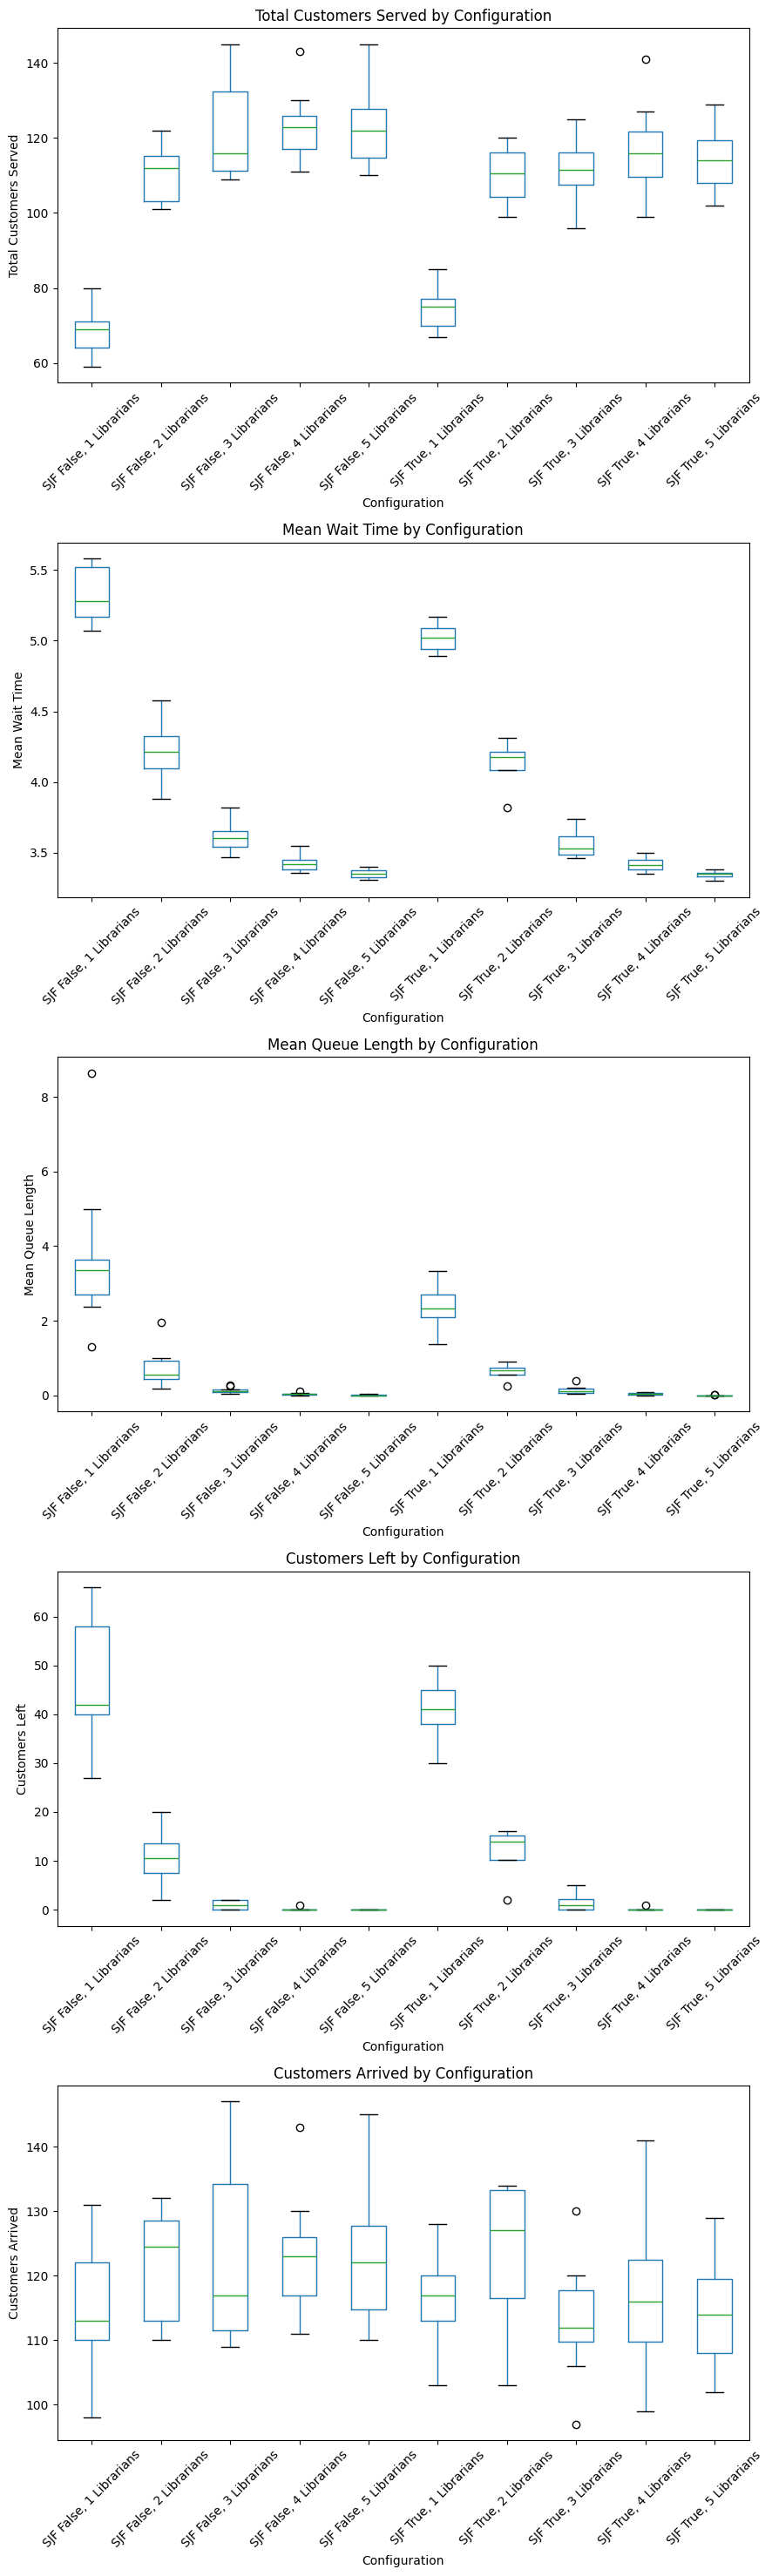

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
data = pd.read_csv('all_simulations_statistics.csv')

data2 = data.copy()
# Crear una columna para representar las configuraciones

data2['Configuration'] = 'SJF ' + data2['SJF'].astype(str) + ', ' + data2['Num Librarians'].astype(str) + ' Librarians'

# Lista de las columnas de interés
columns_of_interest = [
    'Total Customers Served', 'Mean Wait Time', 'Mean Queue Length', 'Customers Left', 'Customers Arrived'
]

# Configurar el grid de gráficos
num_columns = 1
num_rows = (len(columns_of_interest) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(9, 30))
axes = axes.flatten()

# Crear boxplots para cada columna de interés
for i, column in enumerate(columns_of_interest):
    # Crear el boxplot
    data2.boxplot(column=column, by='Configuration', ax=axes[i], grid=False)
    axes[i].set_title(f'{column} by Configuration')
    axes[i].set_xlabel('Configuration')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=45)

# Ajustar diseño para evitar superposición de gráficos
plt.tight_layout()
plt.suptitle('')  # Eliminar el título superfluo generado por pandas
plt.show()


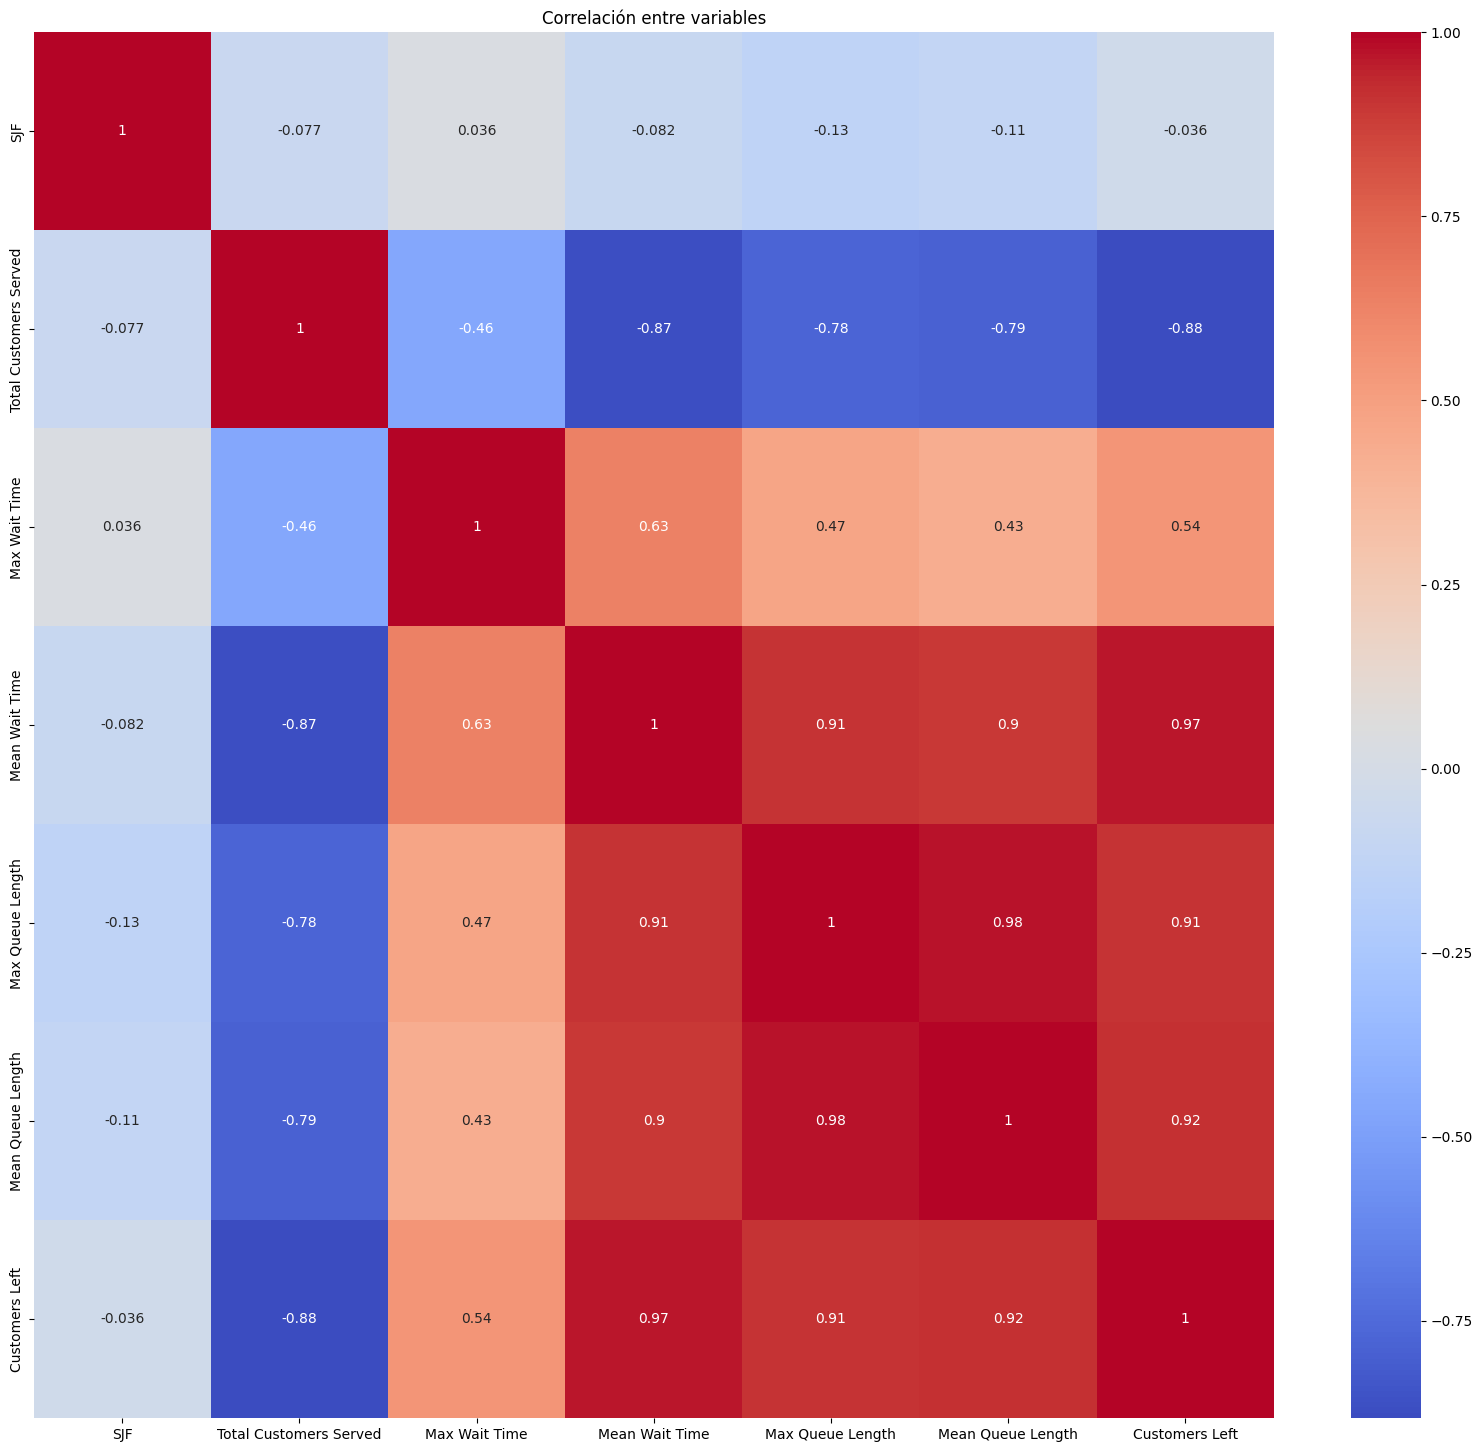

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_exclude = ['Mean Idle Time', 'Max Idle Time', 'Min Idle Time','Num Librarians','Customers Arrived']
data_filtered = data.drop(columns=columns_to_exclude)

# Calcular la matriz de correlación
correlation_matrix = data_filtered.corr()

# Generar el heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()


In [80]:
import pandas as pd
from scipy.stats import ttest_ind, shapiro, levene
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar los datos
# df = pd.read_csv('your_data_file.csv')  # Descomentar y ajustar si es necesario
df = data

# Renombrar las columnas para eliminar espacios
df.rename(columns={'Num Librarians': 'Num_Librarians'}, inplace=True)

# Filtrar los datos para las dos configuraciones específicas
i_librarians = df[(df['Num_Librarians'] ==4) ]
i_1_librarians = df[(df['Num_Librarians'] == 5) ]

# Datos para las pruebas
data_i = i_librarians['Total Customers Served']
data_i_1 = i_1_librarians['Total Customers Served']

# Prueba de normalidad (Shapiro-Wilk)
shapiro_test_i = shapiro(data_i)
shapiro_test_i_1 = shapiro(data_i_1)
print("Shapiro-Wilk Test ", 4 ,":", shapiro_test_i)
print("Shapiro-Wilk Test ", 5 ,":", shapiro_test_i_1)

# Prueba de homogeneidad de varianzas (Levene)
levene_test = levene(data_i, data_i_1)
print("Levene's Test:", levene_test)

# Prueba t de Student para muestras independientes
t_test_result = ttest_ind(data_i, data_i_1, equal_var=(levene_test.pvalue > 0.05))
print("T-test Result:", t_test_result)




Shapiro-Wilk Test  4 : ShapiroResult(statistic=0.9617535590440879, pvalue=0.45049647848133373)
Shapiro-Wilk Test  5 : ShapiroResult(statistic=0.9633163244280137, pvalue=0.559071530501648)
Levene's Test: LeveneResult(statistic=3.133997911132268e-05, pvalue=0.9955580410034232)
T-test Result: TtestResult(statistic=0.3313119241965054, pvalue=0.7419468746160538, df=45.0)


In [81]:
import pandas as pd
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame es `df`
# Filtrar los datos para los dos grupos específicos
group1 = df[df['SJF'] == True]['Mean Wait Time']
group2 = df[df['SJF'] == False]['Mean Wait Time']

# Prueba de Mann-Whitney U
mannwhitney_test = mannwhitneyu(group1, group2, alternative='two-sided')
print("Mann-Whitney U Test Result:", mannwhitney_test)




Mann-Whitney U Test Result: MannwhitneyuResult(statistic=1099.0, pvalue=0.2355292425042248)
